# Supervised Deep Learning Modeling of ECG Data

In [1]:
pip install scaleogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from mat4py import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as GridSpec
from scipy.fftpack import fft
import pywt
import scaleogram as scg 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load the ECG data from Physionet database
#https://github.com/mathworks/physionet_ECG_data/
data = loadmat("/content/drive/MyDrive/ECG_data/ECGData.mat")

In [6]:
ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]

Text(0.5, 1.0, 'NSR Signal')

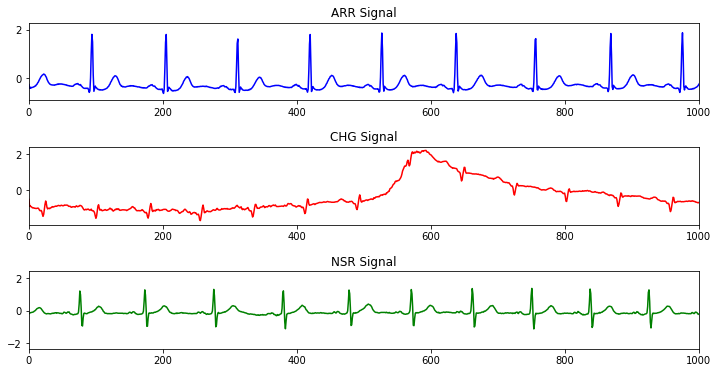

In [7]:
# Data Visualization
fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

#Plot Abnormal Arrhythmia (ARR) signal
arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

#Plot Congestive Heart Failure (CHG) signal
chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

#Plot Normal Sinus Rhythm (NSR) signal
nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

Text(0.5, 1.0, 'FFT of ECG signal')

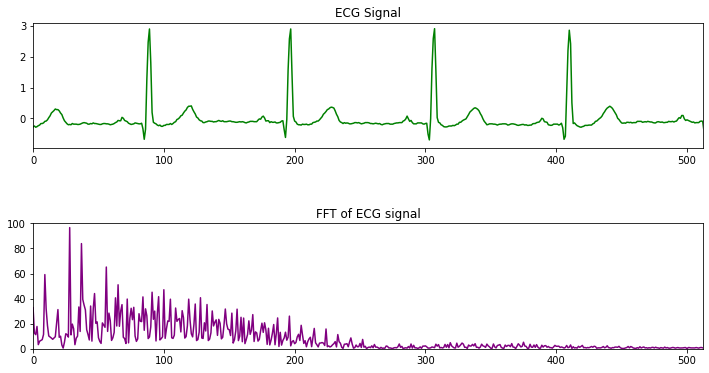

In [8]:
#FFT of ARR signal

nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('ECG Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of ECG signal')

## Wavelet

TypeError: ignored

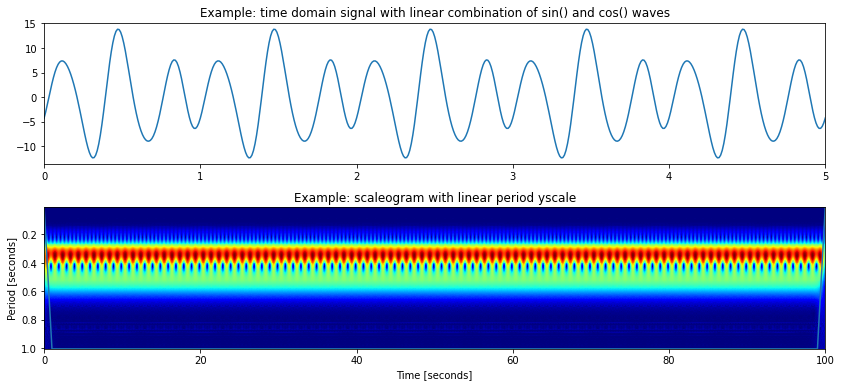

In [9]:
# Example of Wavelet transform for Synthetic data
N = 10000
x_values_wvt = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values_wvt) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values_wvt) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values_wvt + 0.4) 
full_signal_values = (y_values_0 + y_values_1 - y_values_2)

wavelet='cmor0.7-1.5'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x_values_wvt, full_signal_values); ax1.set_xlim(0, 5)
ax1.set_title('Example: time domain signal with linear combination of sin() and cos() waves')
ax2 = scg.cws(x_values_wvt, full_signal_values, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example: scaleogram with linear period yscale')

### Wavelet transform

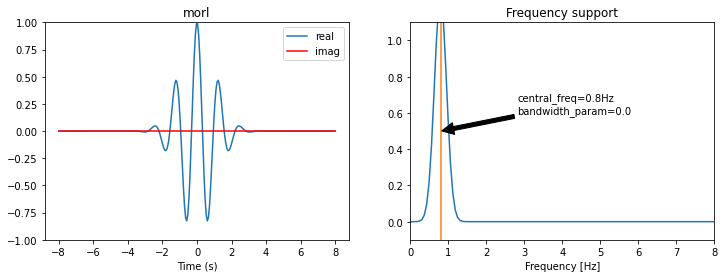

In [10]:
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

### Wavelet family

In [11]:
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

**Family of Wavelets :**   
'Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets'.


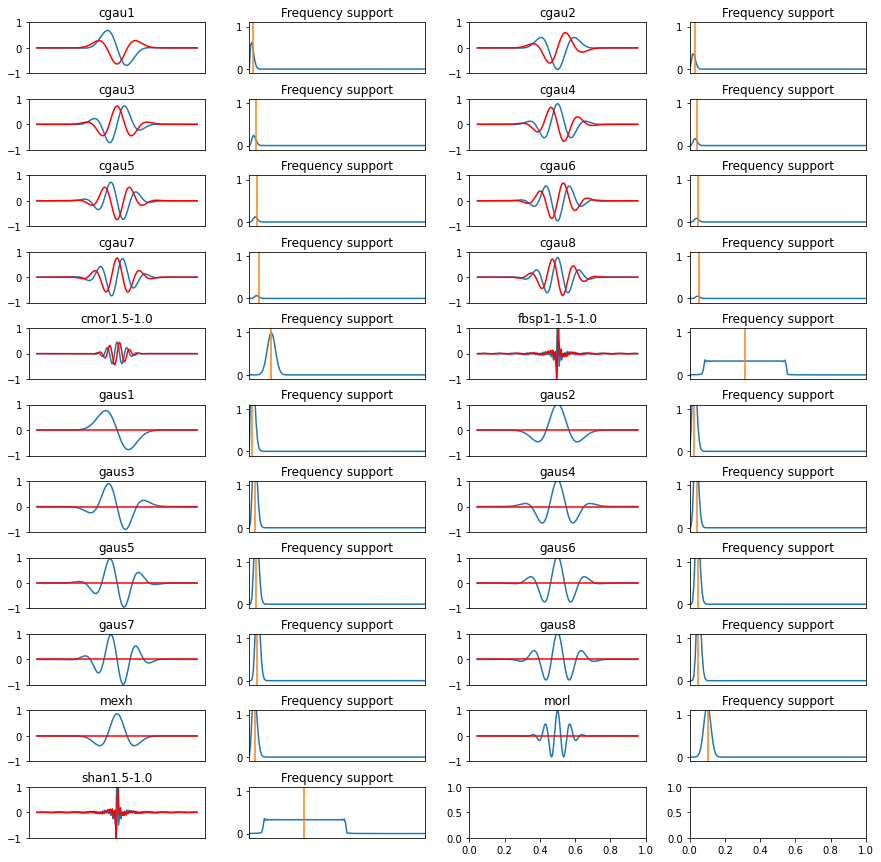

In [12]:
scg.plot_wavelets(figsize=(15,15))

# Scaleogram

Default wavelet function used to compute the transform: morl ( Morlet wavelet )


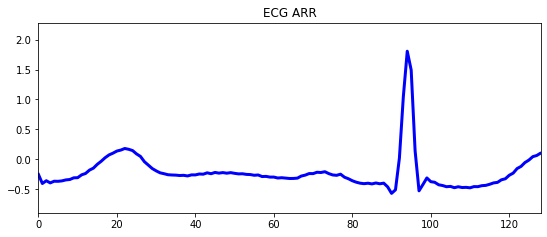

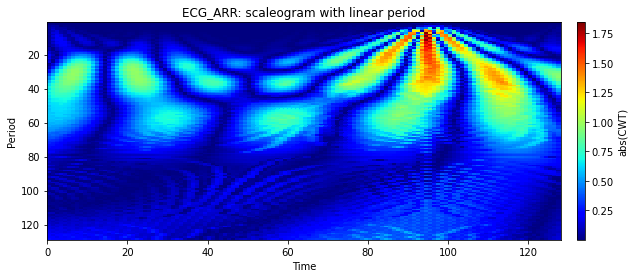

In [13]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")



https://docs.scipy.org/doc/scipy/reference/signal.html   #window-functions

# Classification
* Class1: ARR
* Class2: CHF
* Class3: NSR

In [14]:
#Preparing data for classification
class_ARR = ecg_data[0:95]
class_CHF = ecg_data[96:125]
class_NSR = ecg_data[126:162]

arr_split_256 = [np.array_split(class_ARR[ii], 256) for ii in range(95)]
arr_flatten = [item for sublist in arr_split_256 for item in sublist]

chf_split_256 = [np.array_split(class_CHF[ii], 256) for ii in range(29)]
chf_flatten = [item for sublist in chf_split_256 for item in sublist]

nsr_split_256 = [np.array_split(class_NSR[ii], 256) for ii in range(36)]
nsr_flatten = [item for sublist in nsr_split_256 for item in sublist]

In [15]:
reduce_size = 500
full_1500 = (arr_flatten[0:reduce_size] + chf_flatten[0:reduce_size] + nsr_flatten[0:reduce_size])

In [16]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


fs = len(full_1500[0]) #fs=256
sgn_length = 2000   #only considered 2000 samples out of 65536 
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 500 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = full_1500[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

0 done!
500 done!
1000 done!


In [17]:
list_ecg_labels_arr = ['ARR']*reduce_size 
list_ecg_labels_chf = ['CHF']*reduce_size 
list_ecg_labels_nsr = ['NSR']*reduce_size 
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)

#Split the train test data
X_train, X_test, y_train, y_test = train_test_split(X_full, ecg_labels_encoded, test_size=0.25, random_state=42)

## Training the ECG classifier with the Time-Frequency Representations (TFR)

In [18]:
import sys
from tensorflow import keras

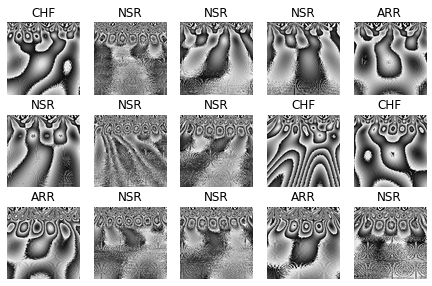

In [19]:
#Inspecting DATA
n_rows = 3
n_cols = 5
class_names = ['ARR', 'CHF', 'NSR']
plt.figure(figsize=(n_cols*1.5, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train[index]*255).astype(np.uint8), cmap="binary", interpolation="spline36")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [20]:
# Sequential Neural Network
num_filter,num_classes = 3, 3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[fs-1, fs-1, num_filter]),
    keras.layers.Dense(300, activation="relu"),                 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 195075)            0         
                                                                 
 dense (Dense)               (None, 300)               58522800  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 58,553,203
Trainable params: 58,553,203
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
36/36 [==============================] - 15s 401ms/step - loss: 1.0709 - accuracy: 0.6773 - val_loss: 0.5507 - val_accuracy: 0.7653
Epoch 2/10
36/36 [==============================] - 14s 382ms/step - loss: 0.3036 - accuracy: 0.8871 - val_loss: 0.2523 - val_accuracy: 0.9200
Epoch 3/10
36/36 [==============================] - 14s 383ms/step - loss: 0.1536 - accuracy: 0.9511 - val_loss: 0.3197 - val_accuracy: 0.8827
Epoch 4/10
36/36 [==============================] - 14s 382ms/step - loss: 0.1443 - accuracy: 0.9600 - val_loss: 0.1685 - val_accuracy: 0.9520
Epoch 5/10
36/36 [==============================] - 14s 386ms/step - loss: 0.0593 - accuracy: 0.9876 - val_loss: 0.1573 - val_accuracy: 0.9653
Epoch 6/10
36/36 [==============================] - 15s 432ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.1479 - val_accuracy: 0.9627
Epoch 7/10
36/36 [==============================] - 14s 391ms/step - loss: 0.0368 - accuracy: 0.9902 - val_loss: 0.4460 - val_accuracy: 0.9200

In [23]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 105ms/step - loss: 0.1587 - accuracy: 0.9627


[0.15868216753005981, 0.9626666903495789]

In [24]:
y_pred = model.predict(X_test)
pred_classes = y_pred.argmax(axis=1)

12/12 [==============================] - 1s 101ms/step


In [25]:
# Evaluate the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_classes)
cm_norm =  cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(189.2400000000001, 0.5, 'True')

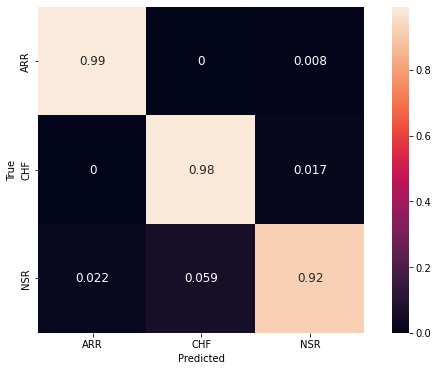

In [26]:
# Plot the Confusion Matrix
df_cm = pd.DataFrame(cm_norm, ['ARR', 'CHF', 'NSR'], ['ARR', 'CHF', 'NSR'])
plt.figure(figsize = (10,6))
conf = sns.heatmap(df_cm, annot=True, square=True, annot_kws={"size": 12})
conf.set_xlabel('Predicted')
conf.set_ylabel('True')

In [27]:
cm=pd.crosstab(y_test,pred_classes)
accuracy=(np.diag(cm).sum()/cm.sum().sum())*100
print(accuracy)
from sklearn.metrics import classification_report
print(pd.DataFrame(classification_report(y_test,pred_classes,output_dict=True)).T)

96.26666666666667
              precision    recall  f1-score     support
0              0.976378  0.992000  0.984127  125.000000
1              0.933884  0.982609  0.957627  115.000000
2              0.976378  0.918519  0.946565  135.000000
accuracy       0.962667  0.962667  0.962667    0.962667
macro avg      0.962213  0.964376  0.962773  375.000000
weighted avg   0.963347  0.962667  0.962478  375.000000
